<a href="https://colab.research.google.com/github/shagun1023/projects/blob/master/temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/temperature.csv', engine = 'python')
df

,record_id,month,day,year,AverageTemperatureFahr,AverageTemperatureUncertaintyFahr,City,country_id,Country,Latitude,Longitude
0,474376,1,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
1,474377,2,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
2,474378,3,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
3,474379,4,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
4,474380,5,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
...,...,...,...,...,...,...,...,...,...,...,...
48465,8258726,5,1,2013,55.0544,32.4896,Wroclaw,POL,Poland,50.63N,16.48E
48466,8258727,6,1,2013,61.1672,32.3330,Wroclaw,POL,Poland,50.63N,16.48E
48467,8258728,7,1,2013,66.7706,32.5706,Wroclaw,POL,Poland,50.63N,16.48E
48468,8258729,8,1,2013,64.5656,32.4842,Wroclaw,POL,Poland,50.63N,16.48E


In [7]:
df.shape

(48470, 11)

Data Cleaning



In [8]:
df.isna().sum()

record_id                              0
month                                  0
day                                    0
year                                   0
AverageTemperatureFahr               929
AverageTemperatureUncertaintyFahr    929
City                                 484
country_id                           484
Country                              484
Latitude                               0
Longitude                              0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

record_id                            0
month                                0
day                                  0
year                                 0
AverageTemperatureFahr               0
AverageTemperatureUncertaintyFahr    0
City                                 0
country_id                           0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [11]:
df.shape

(47068, 11)

In [12]:
df.duplicated()

5        False
6        False
7        False
8        False
9        False
         ...  
48464    False
48465    False
48466    False
48467    False
48468    False
Length: 47068, dtype: bool

In [13]:
df.columns

Index(['record_id', 'month', 'day', 'year', 'AverageTemperatureFahr',
       'AverageTemperatureUncertaintyFahr', 'City', 'country_id', 'Country',
       'Latitude', 'Longitude'],
      dtype='object')

In [14]:
df.drop('record_id', inplace = True, axis = 1)
df

,month,day,year,AverageTemperatureFahr,AverageTemperatureUncertaintyFahr,City,country_id,Country,Latitude,Longitude
5,6,1,1853,51.9062,36.9572,Auckland,NEW,New Zealand,36.17S,175.03E
6,7,1,1853,52.3886,34.5488,Auckland,NEW,New Zealand,36.17S,175.03E
7,8,1,1853,52.8530,33.5498,Auckland,NEW,New Zealand,36.17S,175.03E
8,9,1,1853,52.5776,33.6380,Auckland,NEW,New Zealand,36.17S,175.03E
9,10,1,1853,54.8726,33.9836,Auckland,NEW,New Zealand,36.17S,175.03E
...,...,...,...,...,...,...,...,...,...,...
48464,4,1,2013,46.2902,32.2808,Wroclaw,POL,Poland,50.63N,16.48E
48465,5,1,2013,55.0544,32.4896,Wroclaw,POL,Poland,50.63N,16.48E
48466,6,1,2013,61.1672,32.3330,Wroclaw,POL,Poland,50.63N,16.48E
48467,7,1,2013,66.7706,32.5706,Wroclaw,POL,Poland,50.63N,16.48E


Exploratory Data Analysis



In [15]:
df.columns

Index(['month', 'day', 'year', 'AverageTemperatureFahr',
       'AverageTemperatureUncertaintyFahr', 'City', 'country_id', 'Country',
       'Latitude', 'Longitude'],
      dtype='object')

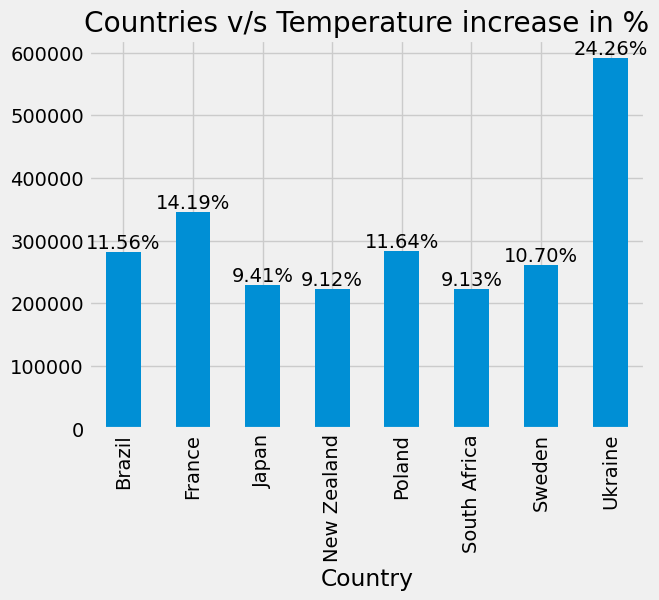

In [16]:
plt.style.use('fivethirtyeight')
df['AverageTemperatureCelsius'] = (df['AverageTemperatureFahr'] - 32) * 5/9

data_group = df.groupby('Country')['AverageTemperatureFahr'].sum()
ax = data_group.plot(kind = 'bar')
plt.title("Countries v/s Temperature increase in %")
totals = data_group.sum()
for i, val in enumerate(data_group):
    percent = (val / totals) * 100
    ax.annotate(f'{percent:.2f}%', (i, val), ha='center', va='bottom')
plt.show()

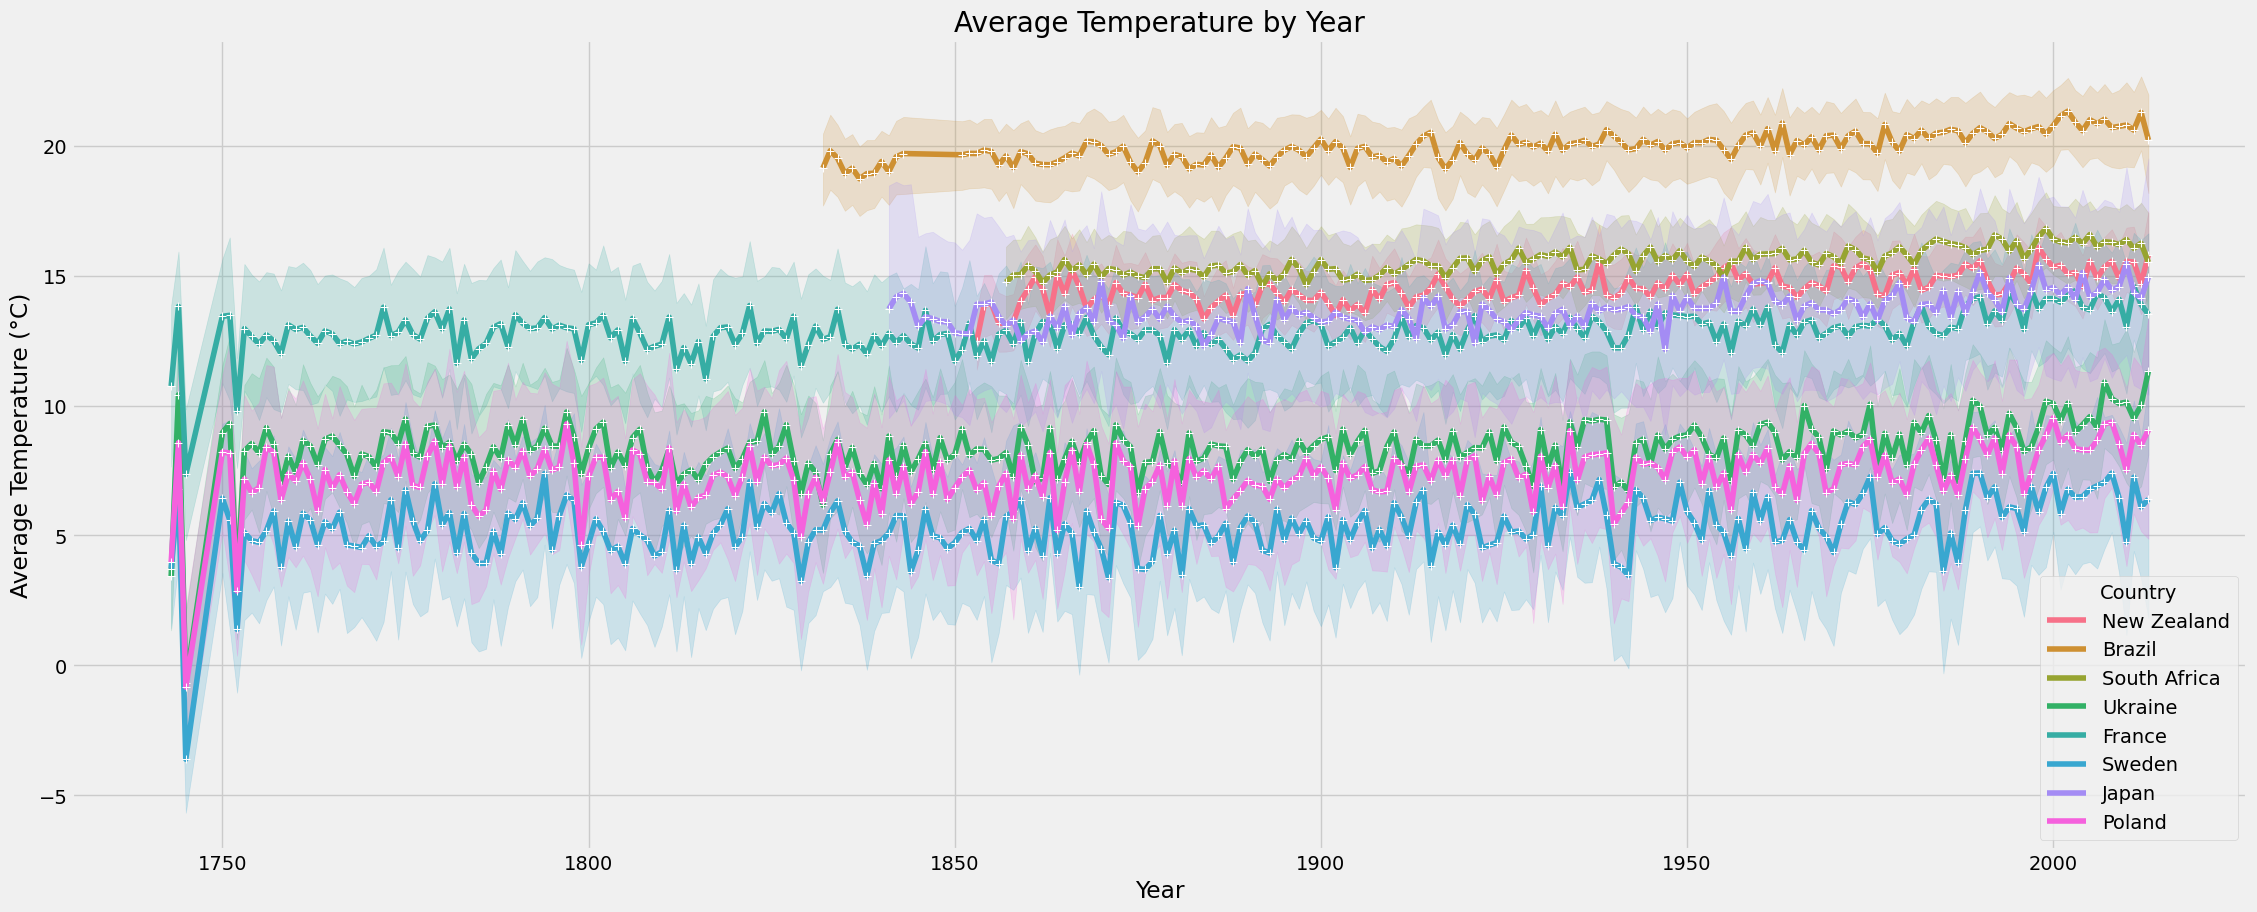

In [17]:
df['AverageTemperatureCelsius'] = (df['AverageTemperatureFahr'] - 32) * 5/9

plt.figure(figsize=(25, 10))

sns.lineplot(x='year', y='AverageTemperatureCelsius', data=df, marker='+', hue='Country')

plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature by Year')


plt.show()

In [ ]:
df.columns

Index(['month', 'day', 'year', 'AverageTemperatureFahr',
       'AverageTemperatureUncertaintyFahr', 'City', 'country_id', 'Country',
       'Latitude', 'Longitude', 'AverageTemperatureCelsius'],
      dtype='object')

Text(0.5, 1.0, 'Temperature(in Celcius) variance over the Months')

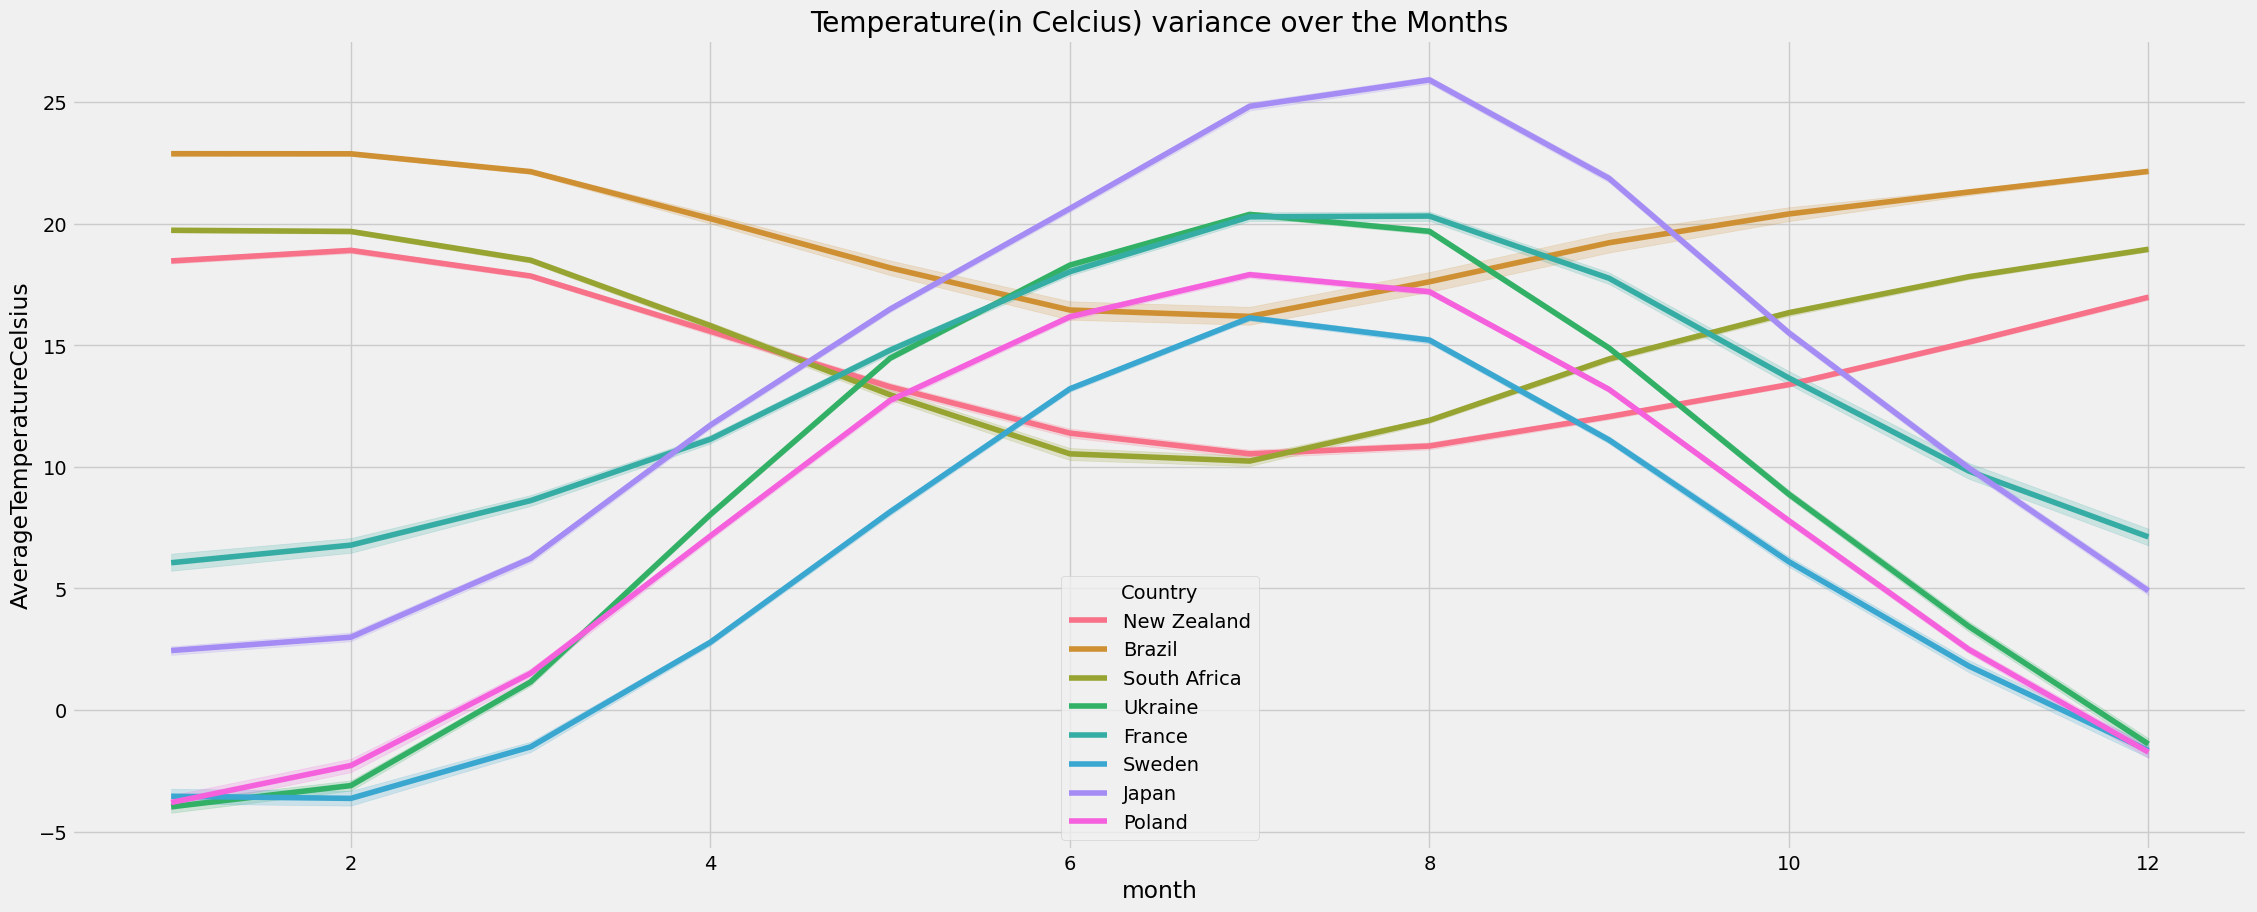

In [18]:
df['AverageTemperatureCelsius'] = (df['AverageTemperatureFahr'] - 32) * 5/9
plt.figure(figsize = (25,10))
sns.lineplot(x= 'month', y = 'AverageTemperatureCelsius',hue = 'Country', data = df)
plt.title("Temperature(in Celcius) variance over the Months")

In [19]:
df.columns

Index(['month', 'day', 'year', 'AverageTemperatureFahr',
       'AverageTemperatureUncertaintyFahr', 'City', 'country_id', 'Country',
       'Latitude', 'Longitude', 'AverageTemperatureCelsius'],
      dtype='object')

Text(0.5, 1.0, 'Temprature Variance over the Latitudes')

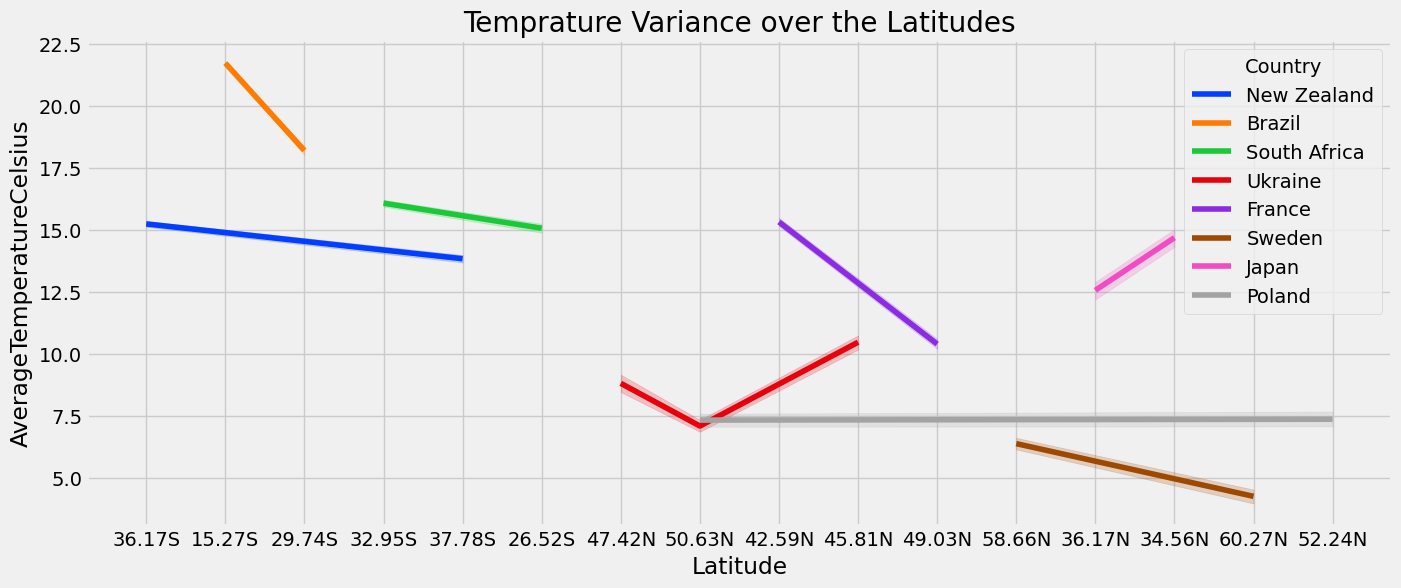

In [20]:
plt.figure(figsize = (15,6))
df['AverageTemperatureCelsius'] = (df['AverageTemperatureFahr'] - 32) * 5/9

sns.lineplot(x = 'Latitude', y = 'AverageTemperatureCelsius', hue = 'Country', data = df, palette = 'bright')
plt.title("Temprature Variance over the Latitudes")

In [21]:
df.columns

Index(['month', 'day', 'year', 'AverageTemperatureFahr',
       'AverageTemperatureUncertaintyFahr', 'City', 'country_id', 'Country',
       'Latitude', 'Longitude', 'AverageTemperatureCelsius'],
      dtype='object')

Text(0.5, 1.0, 'Temprature Uncertainity v/s Countries v/s Temperature Certain')

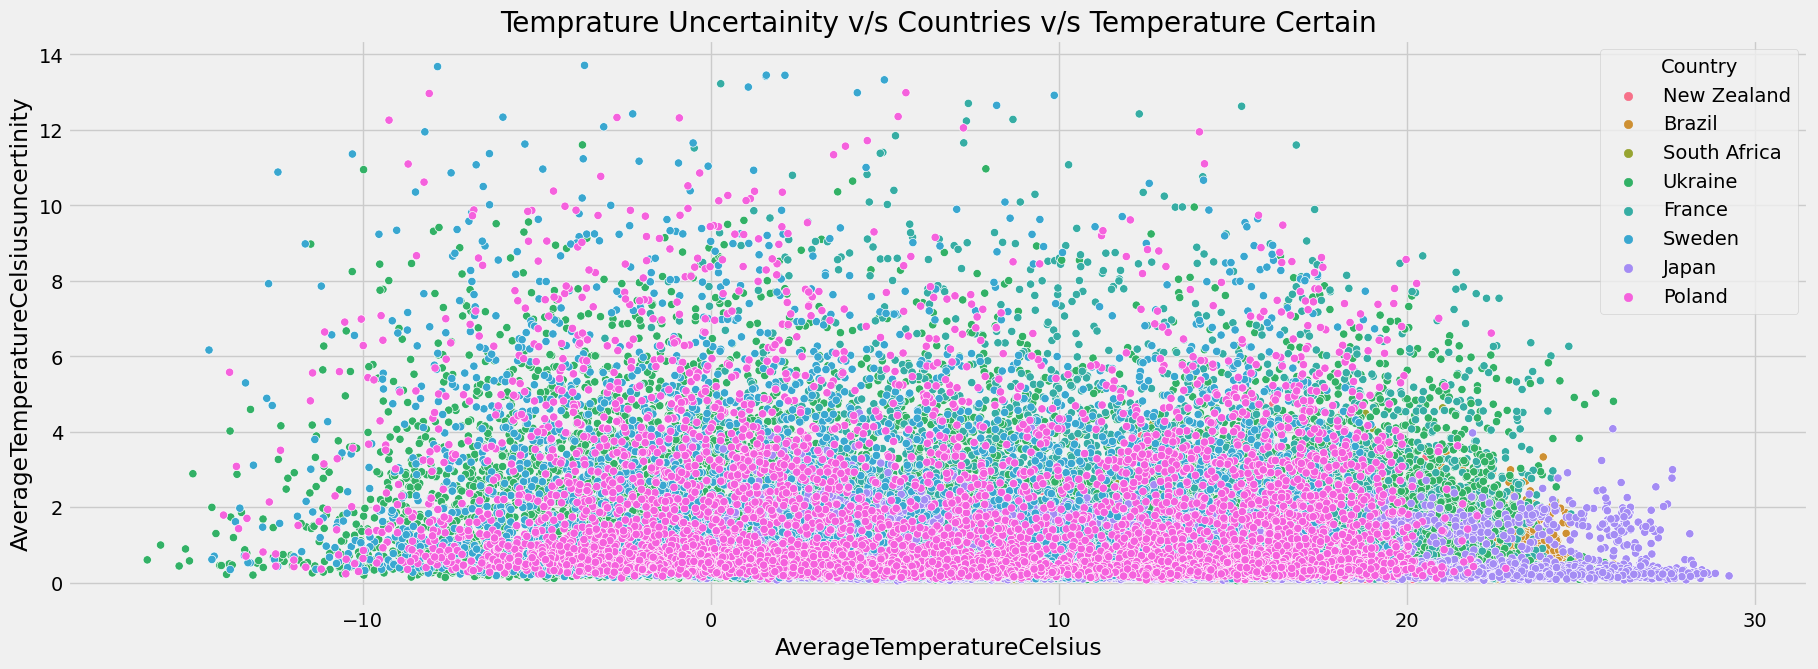

In [22]:
df['AverageTemperatureCelsiusuncertinity'] = (df['AverageTemperatureUncertaintyFahr'] - 32) * 5/9
plt.figure(figsize = (20,7))
sns.scatterplot(x = 'AverageTemperatureCelsius', y = 'AverageTemperatureCelsiusuncertinity', data = df, hue = 'Country')
plt.title("Temprature Uncertainity v/s Countries v/s Temperature Certain")

In [23]:
df.columns

Index(['month', 'day', 'year', 'AverageTemperatureFahr',
       'AverageTemperatureUncertaintyFahr', 'City', 'country_id', 'Country',
       'Latitude', 'Longitude', 'AverageTemperatureCelsius',
       'AverageTemperatureCelsiusuncertinity'],
      dtype='object')

Text(0.5, 1.0, 'Average temperature Uncertianity over Countries ')

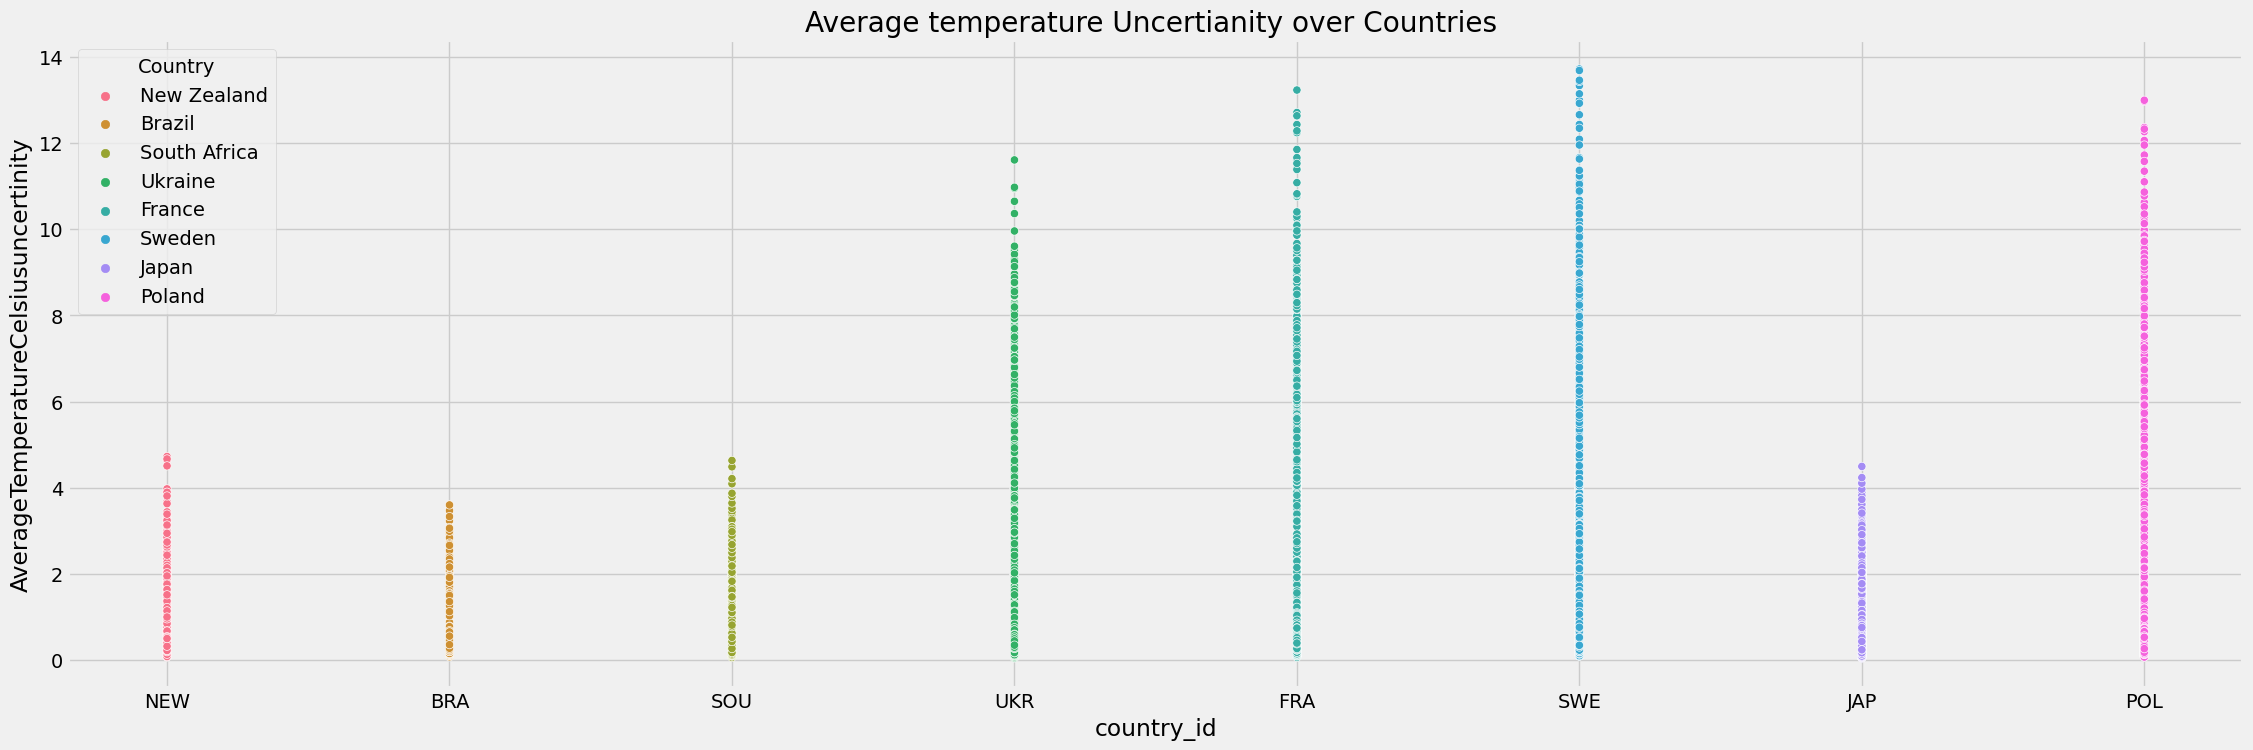

In [24]:
plt.figure(figsize = (25,8))
sns.scatterplot(x = 'country_id', y = 'AverageTemperatureCelsiusuncertinity', hue = 'Country', data = df)
plt.title("Average temperature Uncertianity over Countries ")

In [25]:
df.columns

Index(['month', 'day', 'year', 'AverageTemperatureFahr',
       'AverageTemperatureUncertaintyFahr', 'City', 'country_id', 'Country',
       'Latitude', 'Longitude', 'AverageTemperatureCelsius',
       'AverageTemperatureCelsiusuncertinity'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Auckland'),
  Text(1, 0, 'Brasília'),
  Text(2, 0, 'Canoas'),
  Text(3, 0, 'Cape Town'),
  Text(4, 0, 'Hamilton'),
  Text(5, 0, 'Johannesburg'),
  Text(6, 0, 'Kherson'),
  Text(7, 0, 'Kiev'),
  Text(8, 0, 'Lvov'),
  Text(9, 0, 'Marseille'),
  Text(10, 0, 'Odesa'),
  Text(11, 0, 'Paris'),
  Text(12, 0, 'Stockholm'),
  Text(13, 0, 'Tokyo'),
  Text(14, 0, 'Tottori'),
  Text(15, 0, 'Uppsala'),
  Text(16, 0, 'Warsaw'),
  Text(17, 0, 'Wroclaw')])

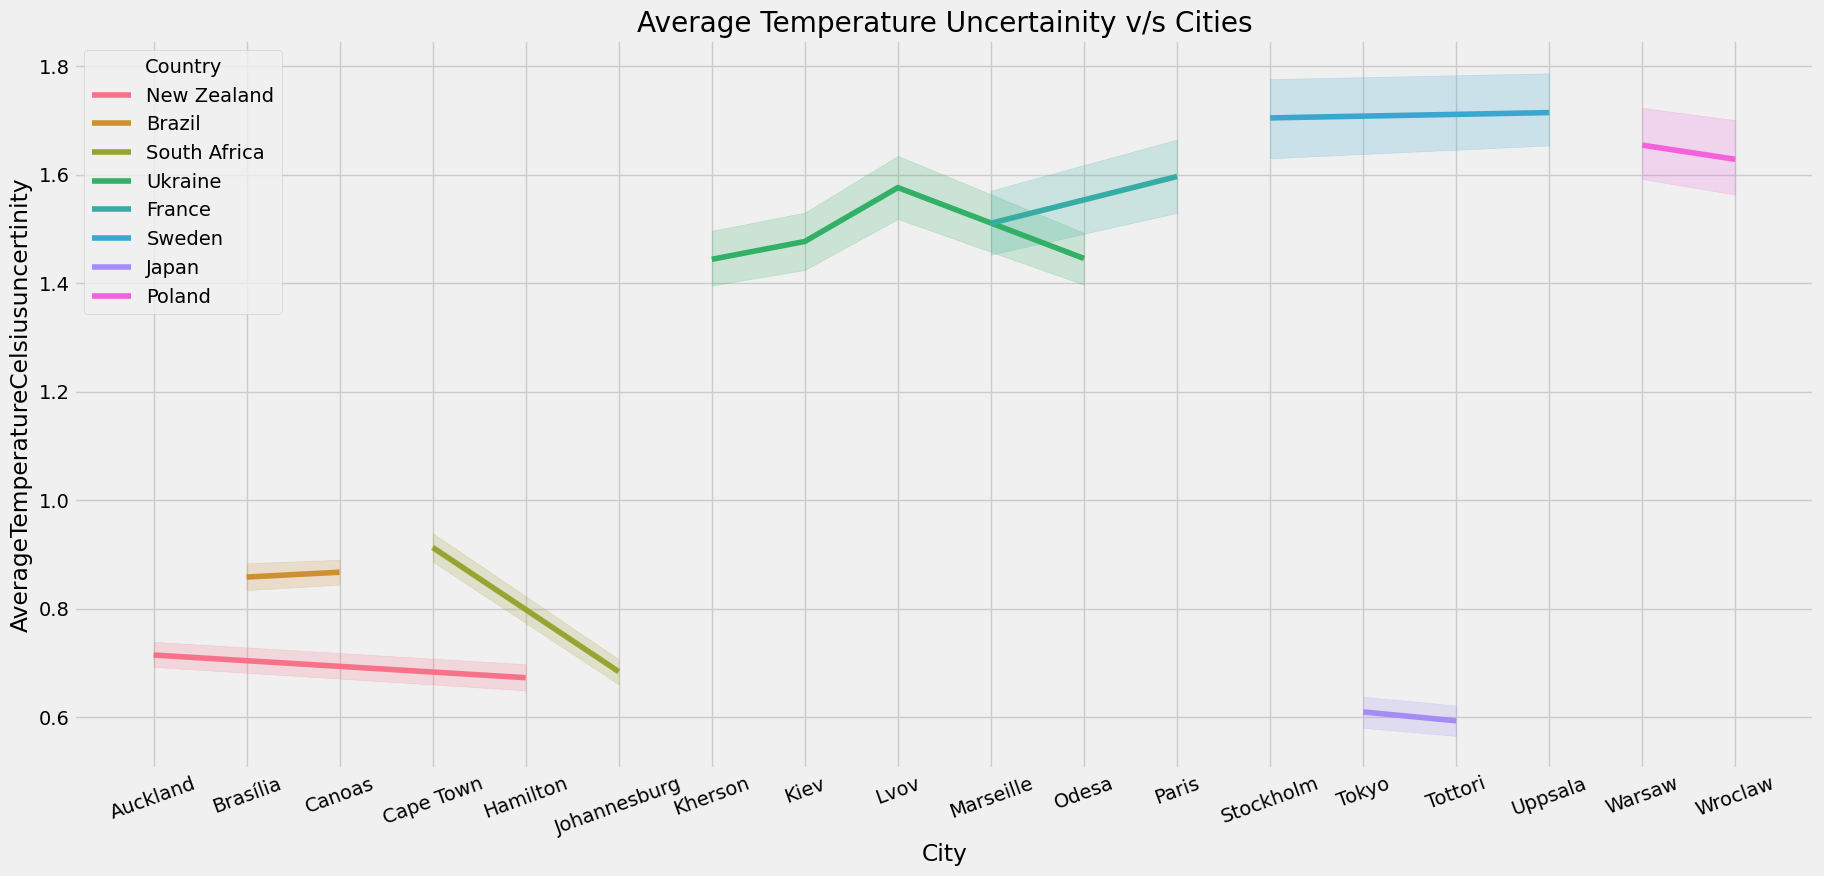

In [26]:
plt.figure(figsize = (20,9))
sns.lineplot(x = 'City', y = 'AverageTemperatureCelsiusuncertinity', data = df, hue = 'Country' )
plt.title("Average Temperature Uncertainity v/s Cities")
plt.xticks(rotation = 20)

In [27]:
df.columns

Index(['month', 'day', 'year', 'AverageTemperatureFahr',
       'AverageTemperatureUncertaintyFahr', 'City', 'country_id', 'Country',
       'Latitude', 'Longitude', 'AverageTemperatureCelsius',
       'AverageTemperatureCelsiusuncertinity'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Auckland'),
  Text(1, 0, 'Brasília'),
  Text(2, 0, 'Canoas'),
  Text(3, 0, 'Cape Town'),
  Text(4, 0, 'Hamilton'),
  Text(5, 0, 'Johannesburg'),
  Text(6, 0, 'Kherson'),
  Text(7, 0, 'Kiev'),
  Text(8, 0, 'Lvov'),
  Text(9, 0, 'Marseille'),
  Text(10, 0, 'Odesa'),
  Text(11, 0, 'Paris'),
  Text(12, 0, 'Stockholm'),
  Text(13, 0, 'Tokyo'),
  Text(14, 0, 'Tottori'),
  Text(15, 0, 'Uppsala'),
  Text(16, 0, 'Warsaw'),
  Text(17, 0, 'Wroclaw')])

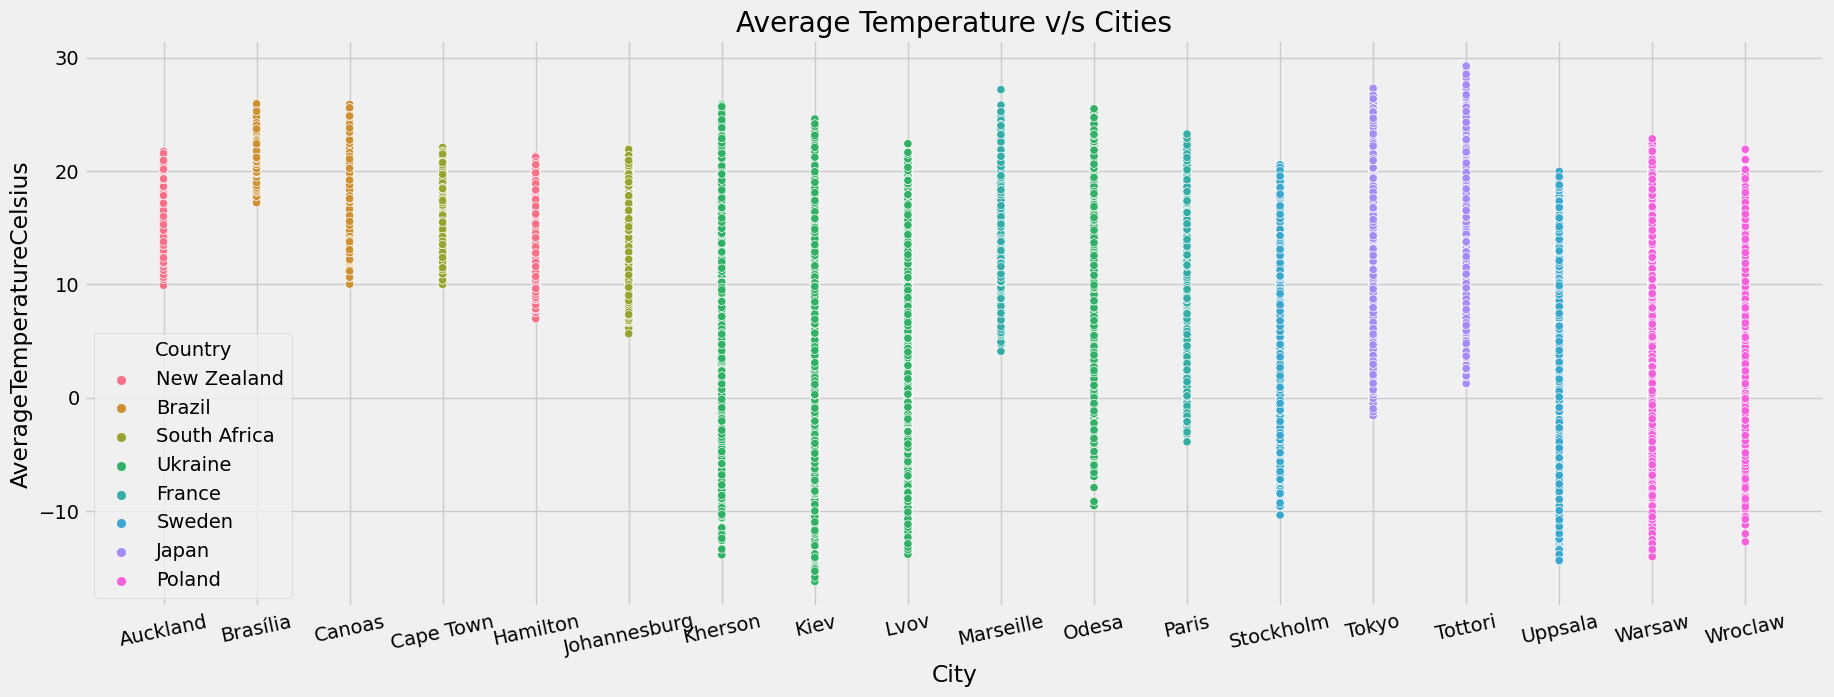

In [28]:
plt.figure(figsize = (20,7))
sns.scatterplot(x = 'City', y = 'AverageTemperatureCelsius', data = df, hue = 'Country' )
plt.title("Average Temperature v/s Cities")
plt.xticks(rotation = 12)

In [29]:
df.columns

Index(['month', 'day', 'year', 'AverageTemperatureFahr',
       'AverageTemperatureUncertaintyFahr', 'City', 'country_id', 'Country',
       'Latitude', 'Longitude', 'AverageTemperatureCelsius',
       'AverageTemperatureCelsiusuncertinity'],
      dtype='object')

Text(0.5, 1.0, 'Countries Location v/s Latitude and Longitude')

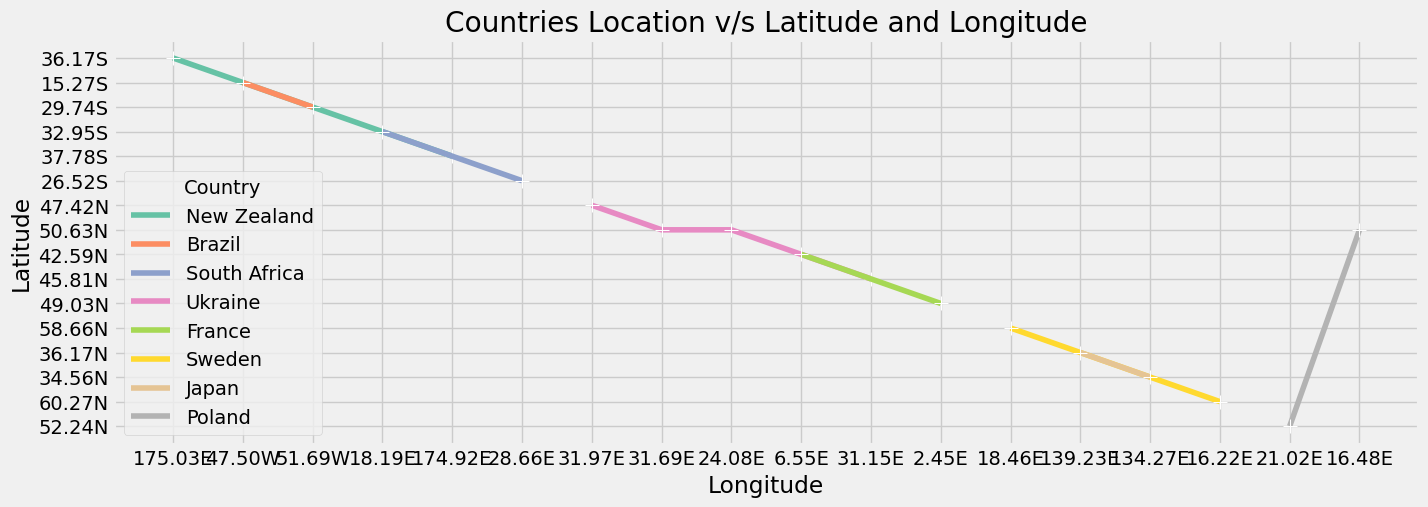

In [30]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'Longitude', y = 'Latitude', hue = 'Country', data = df, marker = '+',markersize=10, palette='Set2')
plt.title("Countries Location v/s Latitude and Longitude")

Text(0.5, 1.0, 'Months v/s Average Temperature Uncertainity')

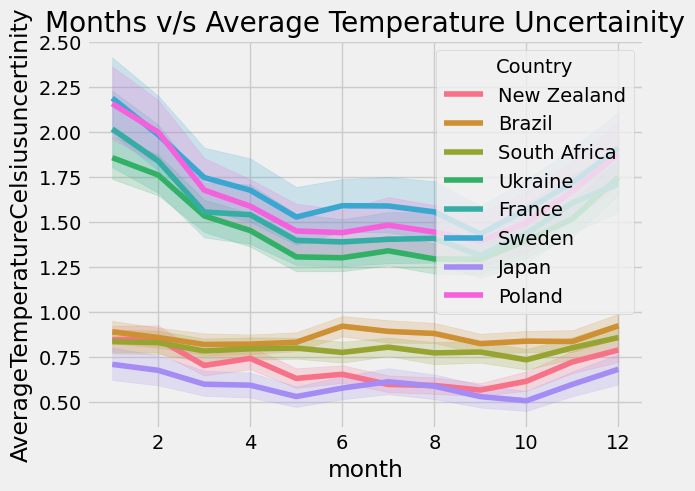

In [33]:
sns.lineplot(x = 'month', y = 'AverageTemperatureCelsiusuncertinity', hue = 'Country', data = df)
plt.title("Months v/s Average Temperature Uncertainity")

<Axes: xlabel='year', ylabel='AverageTemperatureCelsiusuncertinity'>

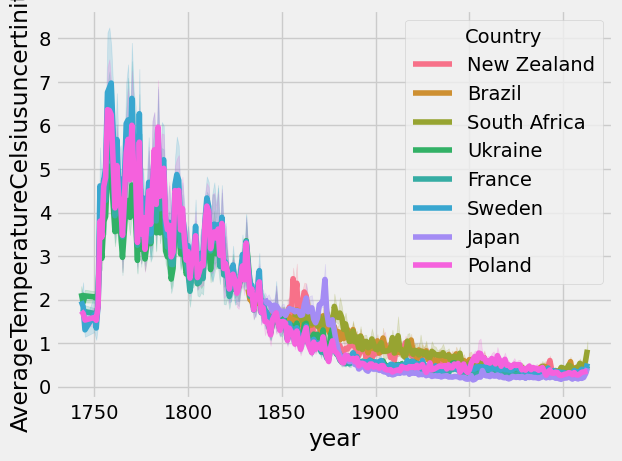

In [34]:
sns.lineplot(x = 'year', y = 'AverageTemperatureCelsiusuncertinity', data = df, hue = 'Country')

Conclusion : The Average Global Temperature increasing over the Years, which is effecting the lives of billions of people and Environment and many animals and plant species has been extinct because of this Global Phenomenon. Countries with North Pole region has been effected by the Average Temperature espcially Ukraine perhaps which led to the war between Ukraine and Russia because of Global Warming, Arctic region is warming which is melting ice and Natural Gases are coming out.

Government Across the diffrent continents must come together and unite.

Governments must come encourage Solar, Wind, Ocean Winds, Tidal energy to develop electricity and make huge investment in the Renewable Energy.